In [ ]:
# this notebook plots graphs based on ctx_sc_cases_[date].csv

In [18]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from parse_case_sheet import get_clean_df
from sc_util import plots_out_dir
%matplotlib inline

In [3]:
df = get_clean_df()
df.head()

Tracers Cortex name with regional identifier  \
Case ID      Channel                                                      
SW121221-02A 2            phal-488                        VISp caudomed   
             4                 bda                        VISp caudolat   
SW121221-03A 2            phal-488                         VISp rostral   
             4                 bda                          VISp caudal   
SW151215-03A 3        aav-tdtomato                             PTLp lat   

                     Actual Anatomical/ Injection Site  \
Case ID      Channel                                     
SW121221-02A 2                              VISp (med)   
             4                           VISp (center)   
SW121221-03A 2                              VISp (med)   
             4                              VISp (med)   
SW151215-03A 3                                    PTLp   

                     Actual Anatomical/ Injection Site Primary  \
Case ID      Channel                                             
SW121221-02A 2                                            VISp   
             4                                            VISp   
SW121221-03A 2                                            VISp   
             4                                            VISp   
SW151215-03A 3                                            PTLp   

                     Layer (injection site) Target SC zones  \
Case ID      Channel                                          
SW121221-02A 2                            5             NaN   
             4                            5           SC.cm   
SW121221-03A 2                            6             NaN   
             4                            5             NaN   
SW151215-03A 3                            5             NaN   

                     Injection Site center ARA level (c)  ML (X)  AP (Y)  \
Case ID      Channel                                                       
SW121221-02A 2                                        96    2.50   -4.28   
             4                                        96    2.75   -4.28   
SW121221-03A 2                                        86    5.00   -3.28   
             4                                   94 (95)    1.80   -4.12   
SW151215-03A 3                                80, 82, 84    3.60   -2.88   

                      DV (Z) Nissl Quality Notes on SC labeling  \
Case ID      Channel                                              
SW121221-02A 2         -1.00           NaN                  NaN   
             4         -1.25           NaN                  NaN   
SW121221-03A 2         -1.75           NaN                  NaN   
             4         -0.75           NaN                  NaN   
SW151215-03A 3         -1.75           NaN                  NaN   

                                          Case Path (Thresholded Files)  \
Case ID      Channel                                                      
SW121221-02A 2        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...   
             4        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...   
SW121221-03A 2        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...   
             4        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...   
SW151215-03A 3        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...   

                                                  Case path (osp files)  
Case ID      Channel                                                     
SW121221-02A 2        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...  
             4        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...  
SW121221-03A 2        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...  
             4        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...  
SW151215-03A 3        /ifs/loni/faculty/dong/mcp/Neda/ConnectionLens...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 86 entries, (SW121221-02A, 2) to (SW190315-07A, 3)
Data columns (total 14 columns):
Tracers                                      86 non-null object
Cortex name with regional identifier         86 non-null object
Actual Anatomical/ Injection Site            86 non-null object
Actual Anatomical/ Injection Site Primary    86 non-null object
Layer (injection site)                       86 non-null object
Target SC zones                              12 non-null object
Injection Site center ARA level (c)          86 non-null object
ML (X)                                       86 non-null float64
AP (Y)                                       86 non-null float64
DV (Z)                                       86 non-null float64
Nissl Quality                                4 non-null object
Notes on SC labeling                         21 non-null object
Case Path (Thresholded Files)                86 non-null object
Case path (osp files)           

In [8]:
print('total case number = {}'.format(df.shape[0]))
print('number of cases with known tracer = {}'.format(df.Tracers.count()))
print('number of cases with known injection site = {}'.format(df['Actual Anatomical/ Injection Site'].count()))

total case number = 86
number of cases with known tracer = 86
number of cases with known injection site = 86


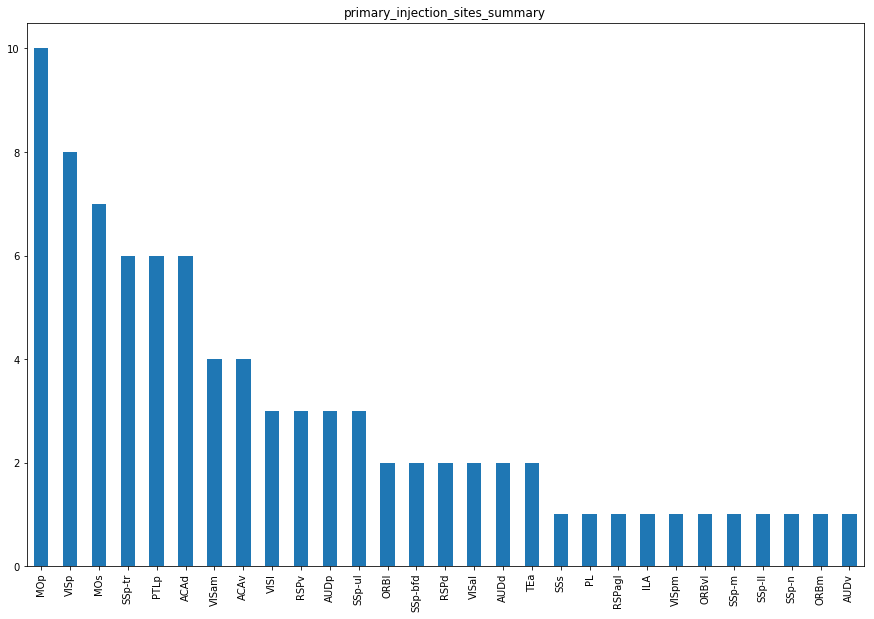

In [11]:
title = 'primary_injection_sites_summary'
df['Actual Anatomical/ Injection Site Primary'].value_counts().plot(kind='bar', figsize=(15, 10), title=title)
plt.savefig(os.path.join(plots_out_dir(), '{}.png'.format(title)))

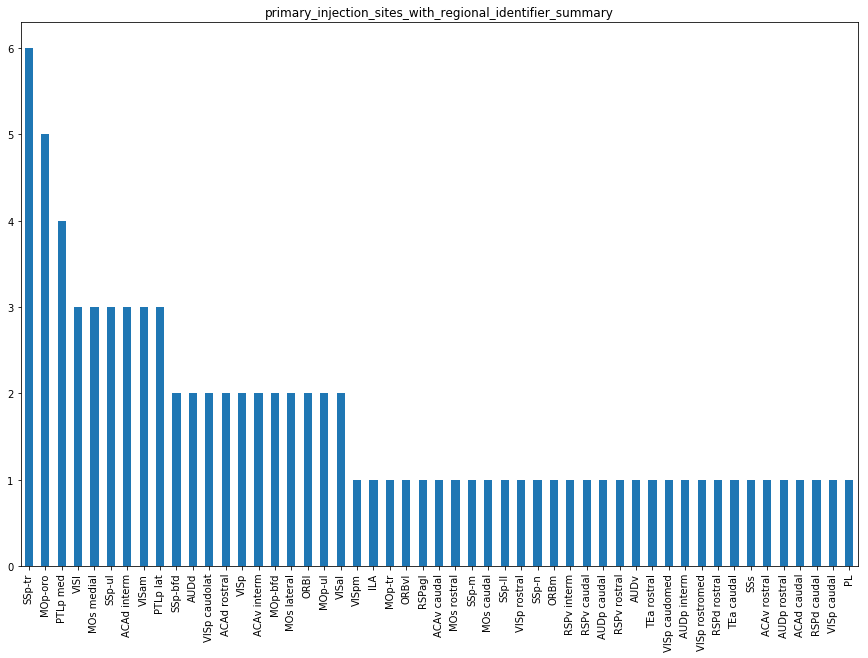

In [12]:
title = 'primary_injection_sites_with_regional_identifier_summary'
df['Cortex name with regional identifier'].value_counts().plot(kind='bar', figsize=(15, 10), title=title)
plt.savefig(os.path.join(plots_out_dir(), '{}.png'.format(title)))

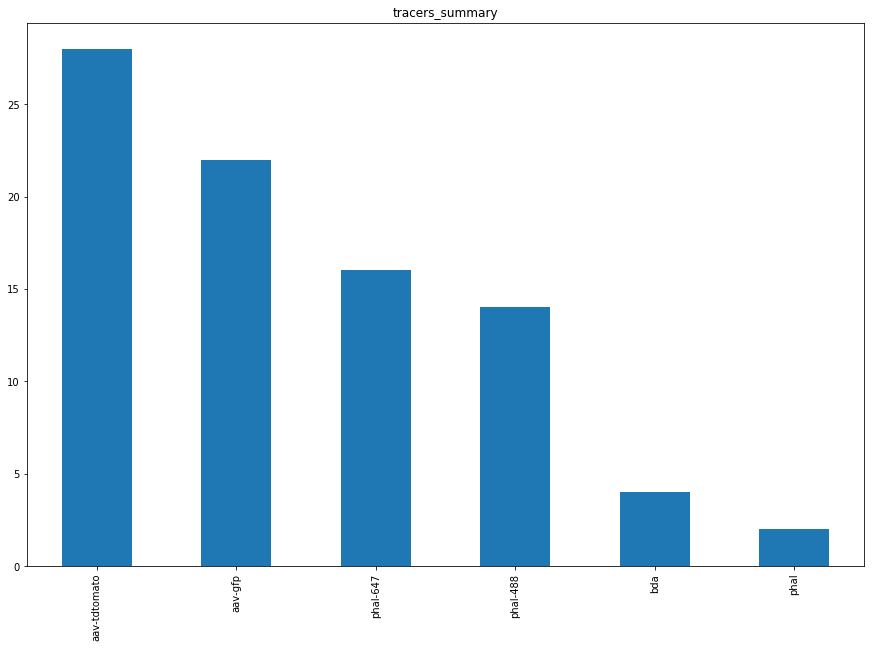

In [13]:
title = 'tracers_summary'
df['Tracers'].value_counts().plot(kind='bar', figsize=(15, 10), title=title)
plt.savefig(os.path.join(plots_out_dir(), '{}.png'.format(title)))

In [16]:
df_injection_tracer = df.groupby('Actual Anatomical/ Injection Site Primary')['Tracers'].value_counts().rename('counts').reset_index()
df_injection_tracer.head()

,Actual Anatomical/ Injection Site Primary,Tracers,counts
0,ACAd,aav-tdtomato,3
1,ACAd,phal-647,3
2,ACAv,phal-488,2
3,ACAv,aav-tdtomato,1
4,ACAv,phal-647,1


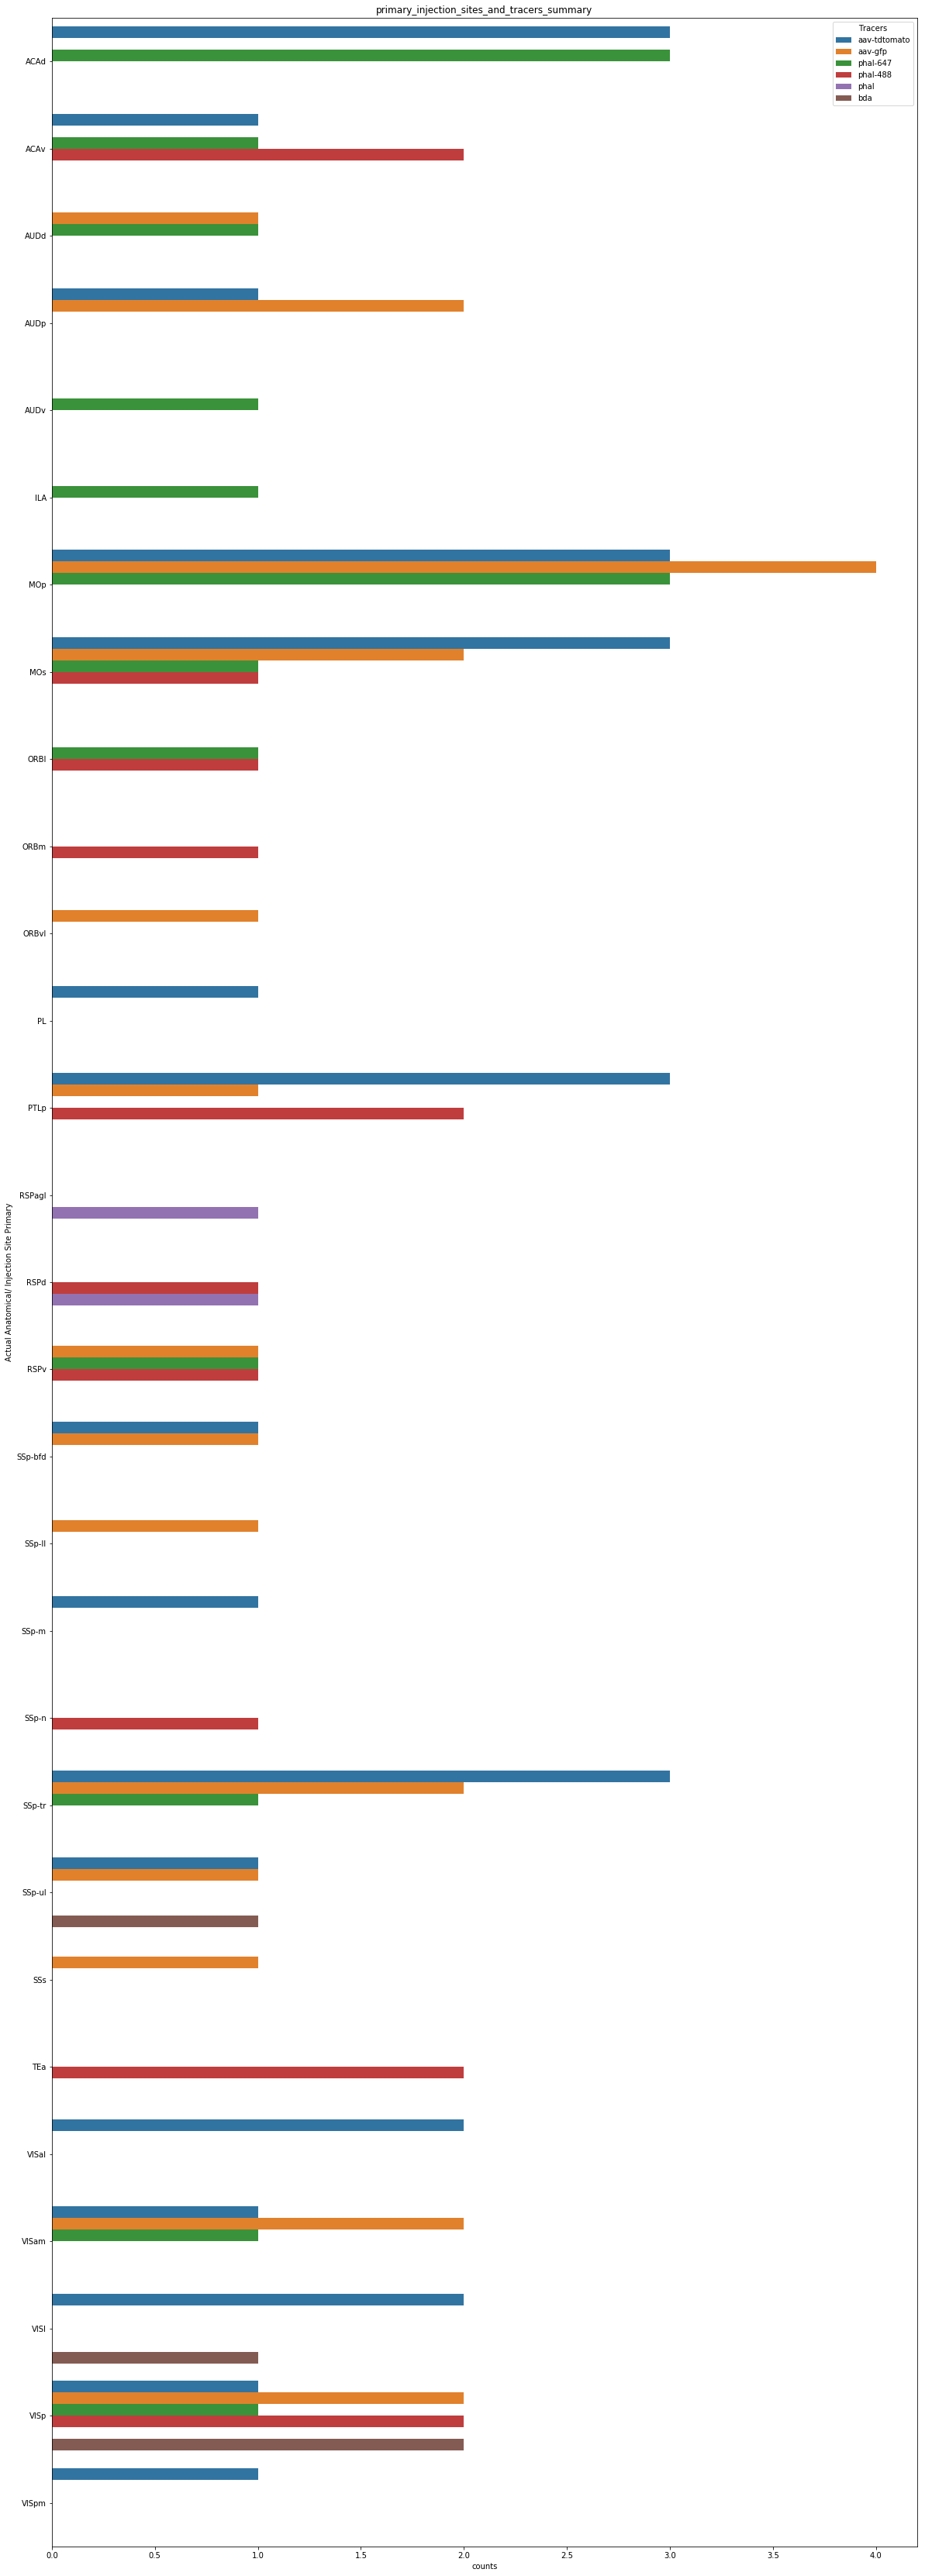

In [19]:
title = 'primary_injection_sites_and_tracers_summary'
fig, ax = plt.subplots(figsize=(20, 60))
sns.barplot(y='Actual Anatomical/ Injection Site Primary', x='counts', hue='Tracers', 
            hue_order=['aav-tdtomato', 'aav-gfp', 'phal-647', 'phal-488', 'phal', 'bda'], data=df_injection_tracer, ax=ax)
ax.set_title(title)
plt.savefig(os.path.join(plots_out_dir(), '{}.png'.format(title)))

In [ ]:
# what does asterisk at end of case id mean: cases with both contralateral and ipsilateral labeling has an asterisk (Nora)
# ML, AP, DV columns: actual injection coordinate (Nora)
# diff between Cortex name with regional identifier and Actual Anatomical/ Injection Site
# foot note section: On iConnectome, OTHER, include?
# tally in foot note section: not same as above

In [77]:
# save cleaned dataframe
df.to_csv('ctx_sc_cases_clean.csv')